# IMPLEMENTACIÓN DEL ALGORITMO GENÉTICO

### Cargando las funciones y bibliotecas necesarias

In [1]:
from datos_transformacion import *
import time
from algoritmo_genetico import *
from graficas_P1 import *
from visualizador import *

### Cargando los datos de los archivos

In [2]:
m_oper_energia = cargar_matriz_operaciones_maquina(r"C:\Users\DELL5400\Documents\noveno semestre\Topicos de Algoritmos Bioinspirados\Genetic-Algorithms\Problema asignación de tareas\clase\datos_practica\datos_operacion_consumo.txt")
m_oper_tiempo = cargar_matriz_operaciones_maquina(r"C:\Users\DELL5400\Documents\noveno semestre\Topicos de Algoritmos Bioinspirados\Genetic-Algorithms\Problema asignación de tareas\clase\datos_practica\datos_operacion_tiempo.txt")
tareas = cargar_matriz_tareas(r"C:\Users\DELL5400\Documents\noveno semestre\Topicos de Algoritmos Bioinspirados\Genetic-Algorithms\Problema asignación de tareas\clase\datos_practica\tareas.txt")


### Configuracion de hiperparámetros del algoritmo

In [3]:
total_op = sum(len(sublista) for sublista in tareas)
tam_poblacion = 150
n_generaciones = 200
p_cruza = 0.7
p_mutacion = 0.3
random.seed(43)

### Generando la población inicial

In [4]:
poblacion = generar_poblacion_inicial(tam_poblacion, total_op, m_oper_tiempo, m_oper_energia, tareas)

### Variables para guardar los frentes y su posterior graficación

In [5]:
conjuntos_F_Pareto = [ ]
frentes_p_3_gen = [ ]
conjunto_soluciones_dist_crowding = [ ]
vector_idx_frentes_dist_crowding = [ ]

## CODIFICACION DEL ALGORITMO GENÉTICO

In [6]:
tiempo_inicio = time.time()
for i in range(n_generaciones):

    
    # Selección de padres
    padres_idxs = seleccion_por_torneo(poblacion, 2, "minimize")

    # Cruza 
    hijos = crearHijos(poblacion, padres_idxs, p_cruza, 3, m_oper_tiempo, m_oper_energia, tareas)

    # Mutacion 
    hijos = mutar_poblacion_por_desplazamiento(hijos, p_mutacion, m_oper_tiempo, m_oper_energia, tareas)

    # Población completa 
    poblacion_combinada = poblacion + hijos

    # Seleccion de la nueva población 

    poblacion, frentes_P, vectores_dist_crowding, frente_dist_crowding = nueva_poblacion(poblacion_combinada, tam_poblacion)

    # Guardando los valores del frente de pareto para graficarlos después.
    if i in [0, n_generaciones//2, 3*(n_generaciones//4), n_generaciones-1]:
        conjuntos_F_Pareto.append(frentes_P)
        conjunto_soluciones_dist_crowding.append(vectores_dist_crowding)
        vector_idx_frentes_dist_crowding.append(frente_dist_crowding)
    
    if i in [0,1,2]:
        frentes_p_3_gen.append(frentes_P)


    # Guardando los valores de os frentes de pareto

tiempo_fin = time.time()

print("---------------------------")
print(f"La iteración completa fue de iteración tarda: {tiempo_fin - tiempo_inicio:.6f} segundos")



---------------------------
La iteración completa fue de iteración tarda: 125.339648 segundos


### Obteniendo los frentes de pareto de las últimas generaciones

El primer frente ordenado por F1 tiene el mejor en: [24.2 69.1] y el peor en [73.9 37.8]
El primer frente ordenado por F2 tiene el mejor en: [73.9 37.8] y el peor en [24.2 69.1]


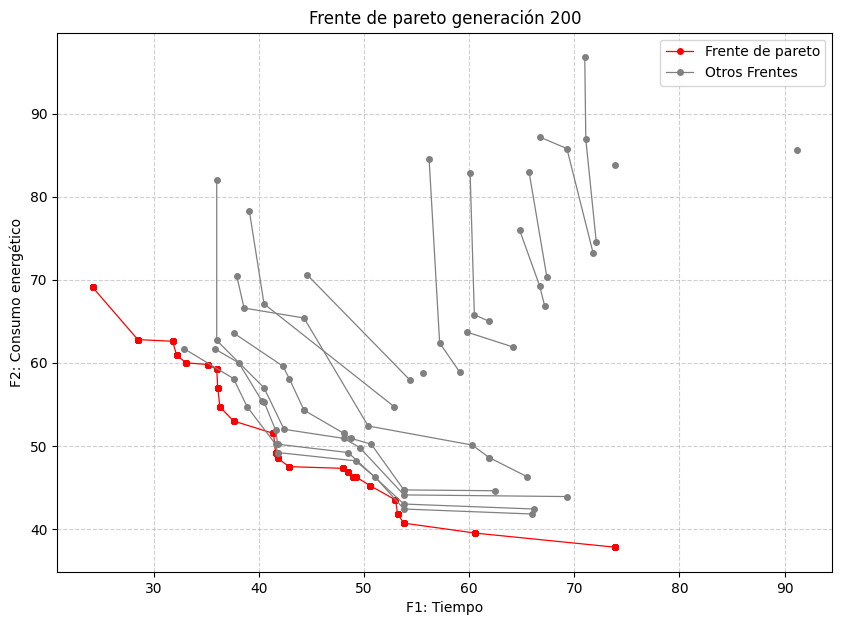

In [7]:
primer_frente = conjuntos_F_Pareto[-1][0]
primer_frente_F1 = sorted(primer_frente, key=lambda x:x[0])
primer_frente_F2 = sorted(primer_frente, key=lambda x:x[1])
print(f"El primer frente ordenado por F1 tiene el mejor en: {primer_frente_F1[0]} y el peor en {primer_frente_F1[-1]}")
print(f"El primer frente ordenado por F2 tiene el mejor en: {primer_frente_F2[0]} y el peor en {primer_frente_F2[-1]}")
cod_mejor_ind = poblacion[0]
cod_mejor_energia = poblacion[-1]

graficar_F_pareto_1_generacion(conjuntos_F_Pareto[-1], n_generaciones)




#fitness_mejor = evaluar_fitness(cod_mejor_ind, m_oper_tiempo, m_oper_energia, tareas)
#print(f"El mejor vector es: {cod_mejor_ind} y tiene un fitness de: {fitness_mejor}")

### Obteniendo los vectores codificados de las soluciones extremos

In [8]:
cod_mejor_tiempo = sorted(poblacion, key= lambda elemento: elemento[1][0])
cod_mejor_energia = sorted(poblacion, key= lambda elemento: elemento[1][1])
print(f"El código del mejor individuo en tiempo es: : {cod_mejor_tiempo[0]}")
print(f"El código del mejor individuo en energía es: {cod_mejor_energia[0]}")


El código del mejor individuo en tiempo es: : [[2, 1, 1, 3, 4, 1, 3, 2, 4, 4, 4, 2, 1, 2, 2, 3, 3, 3, 1], array([24.2, 69.1])]
El código del mejor individuo en energía es: [[2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1], array([73.9, 37.8])]


### Gráficas del frente de pareto en las primeras 3 generaciones

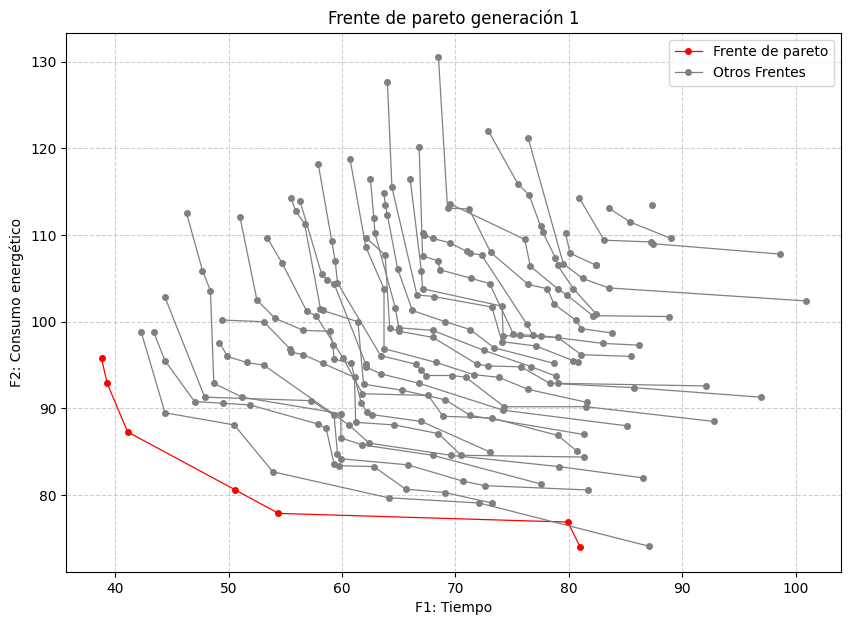

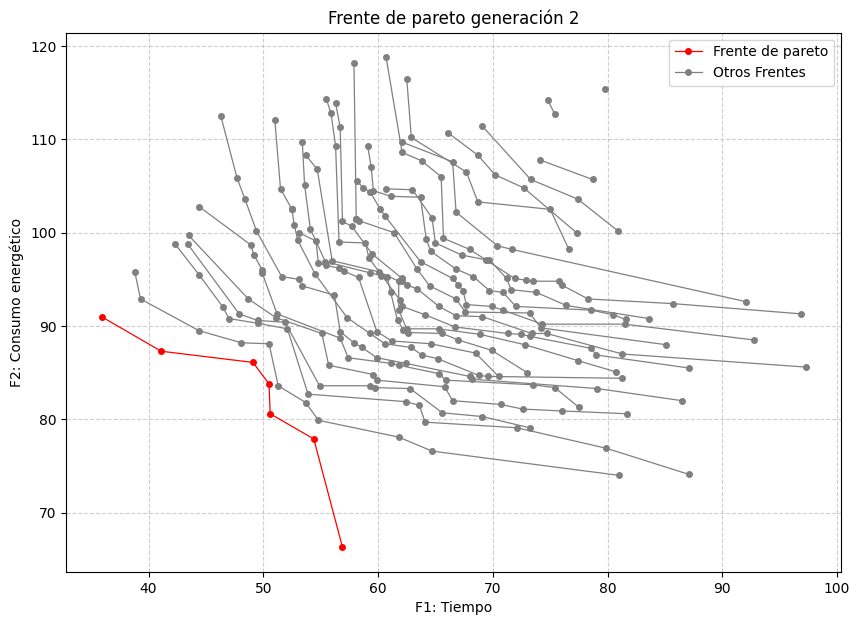

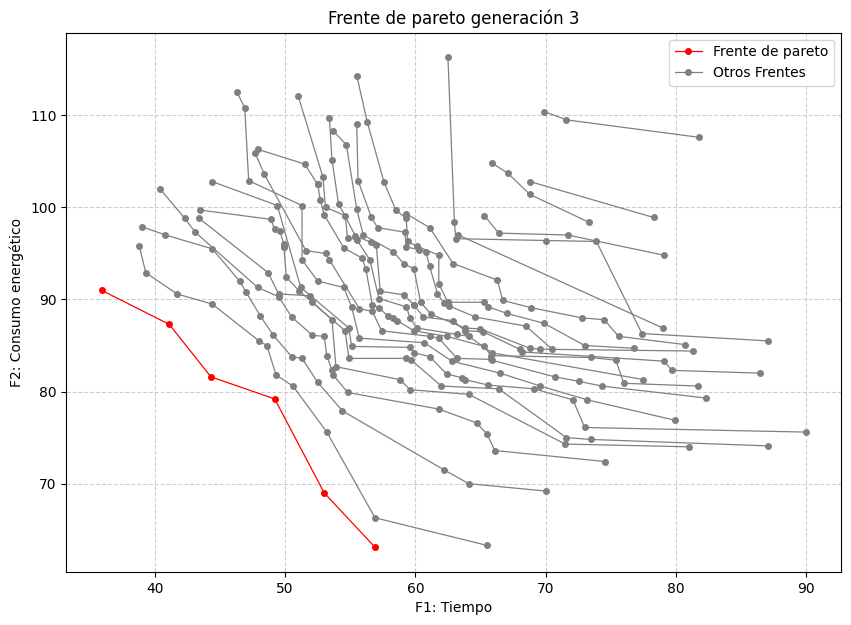

In [9]:
# Grafica de la primera generación 
graficar_F_pareto_1_generacion(frentes_p_3_gen[0], 1)
graficar_F_pareto_1_generacion(frentes_p_3_gen[1], 2)
graficar_F_pareto_1_generacion(frentes_p_3_gen[2], 3)

### Graficando el grid con los frentes de pareto de varias generaciones


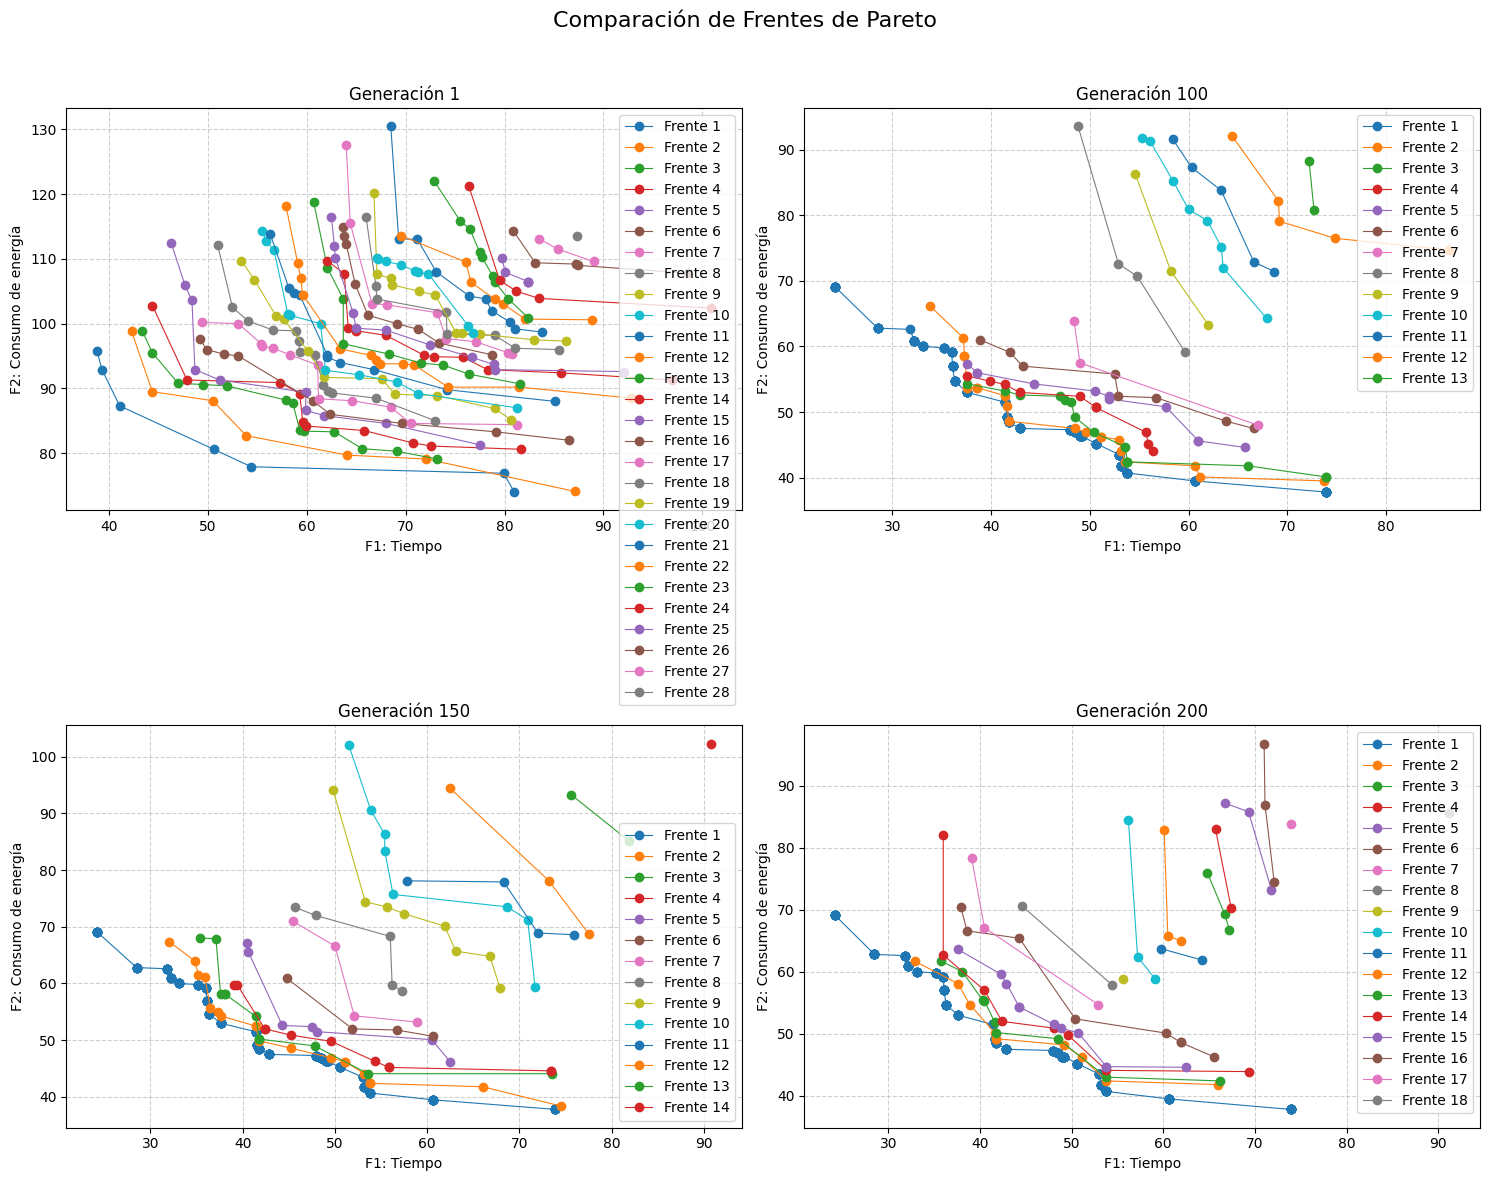

In [10]:
graficar_grid_pareto(conjuntos_F_Pareto, ['Generación 1', f'Generación {n_generaciones // 2}', f'Generación { 3*(n_generaciones//4)}', f'Generación {n_generaciones}'])

### Graficando la elección de la distancia de crowding

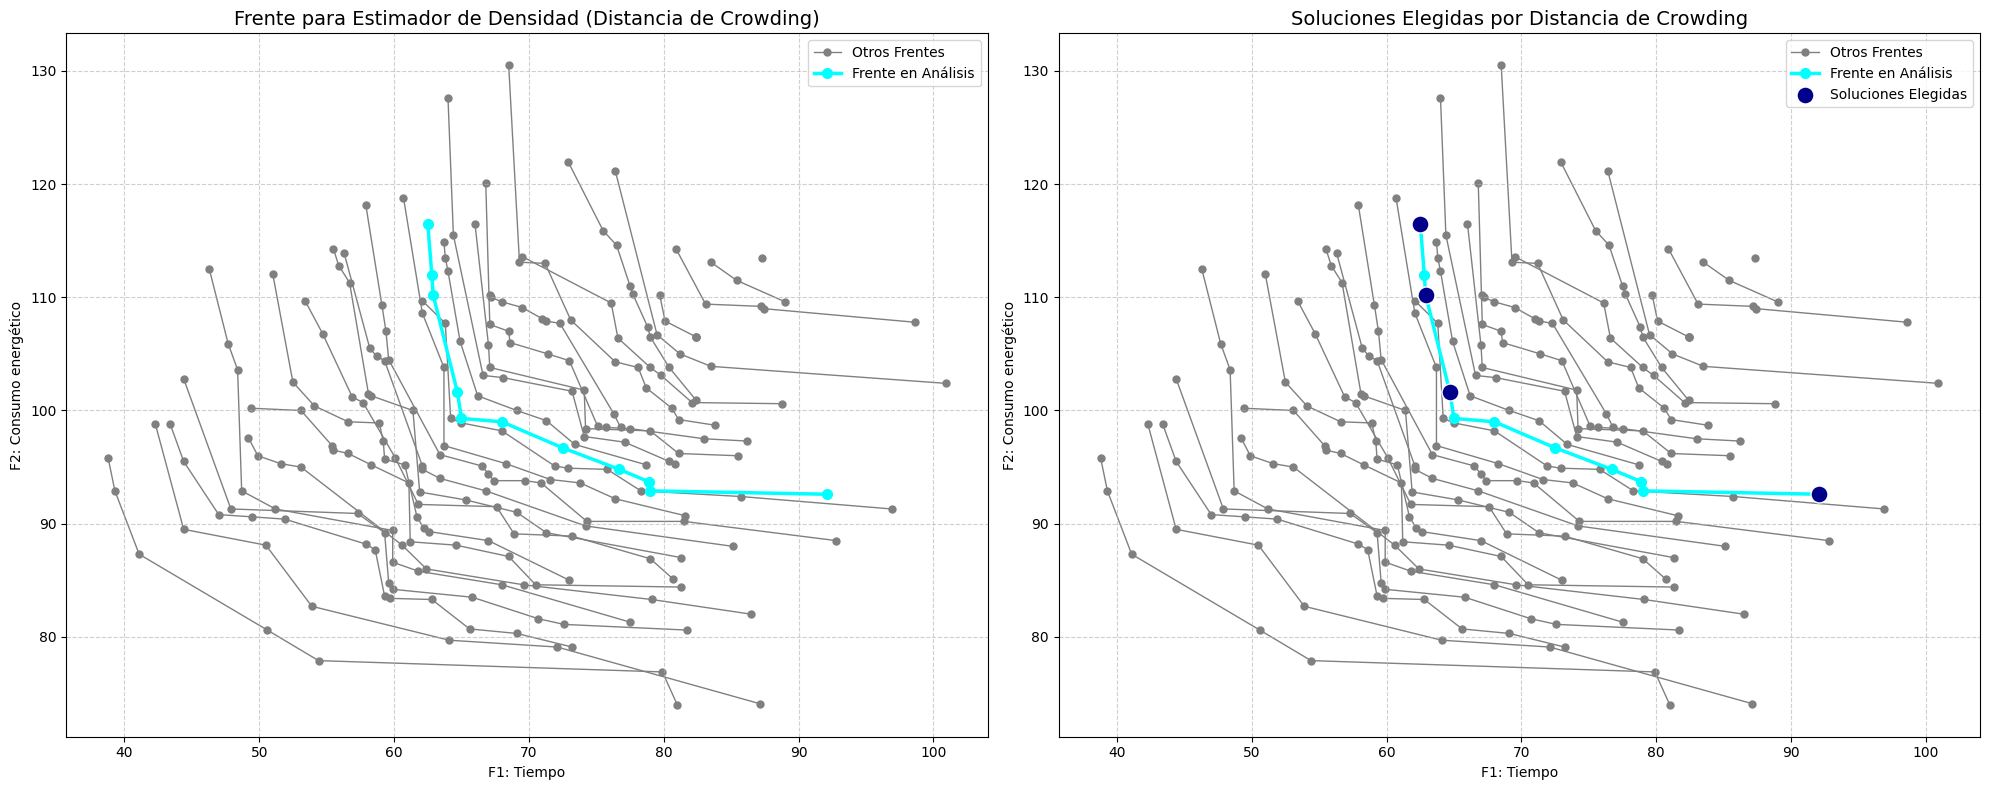

In [11]:
graficar_distancia_crowding(conjuntos_F_Pareto[0], vector_idx_frentes_dist_crowding[0]-1, conjunto_soluciones_dist_crowding[0])

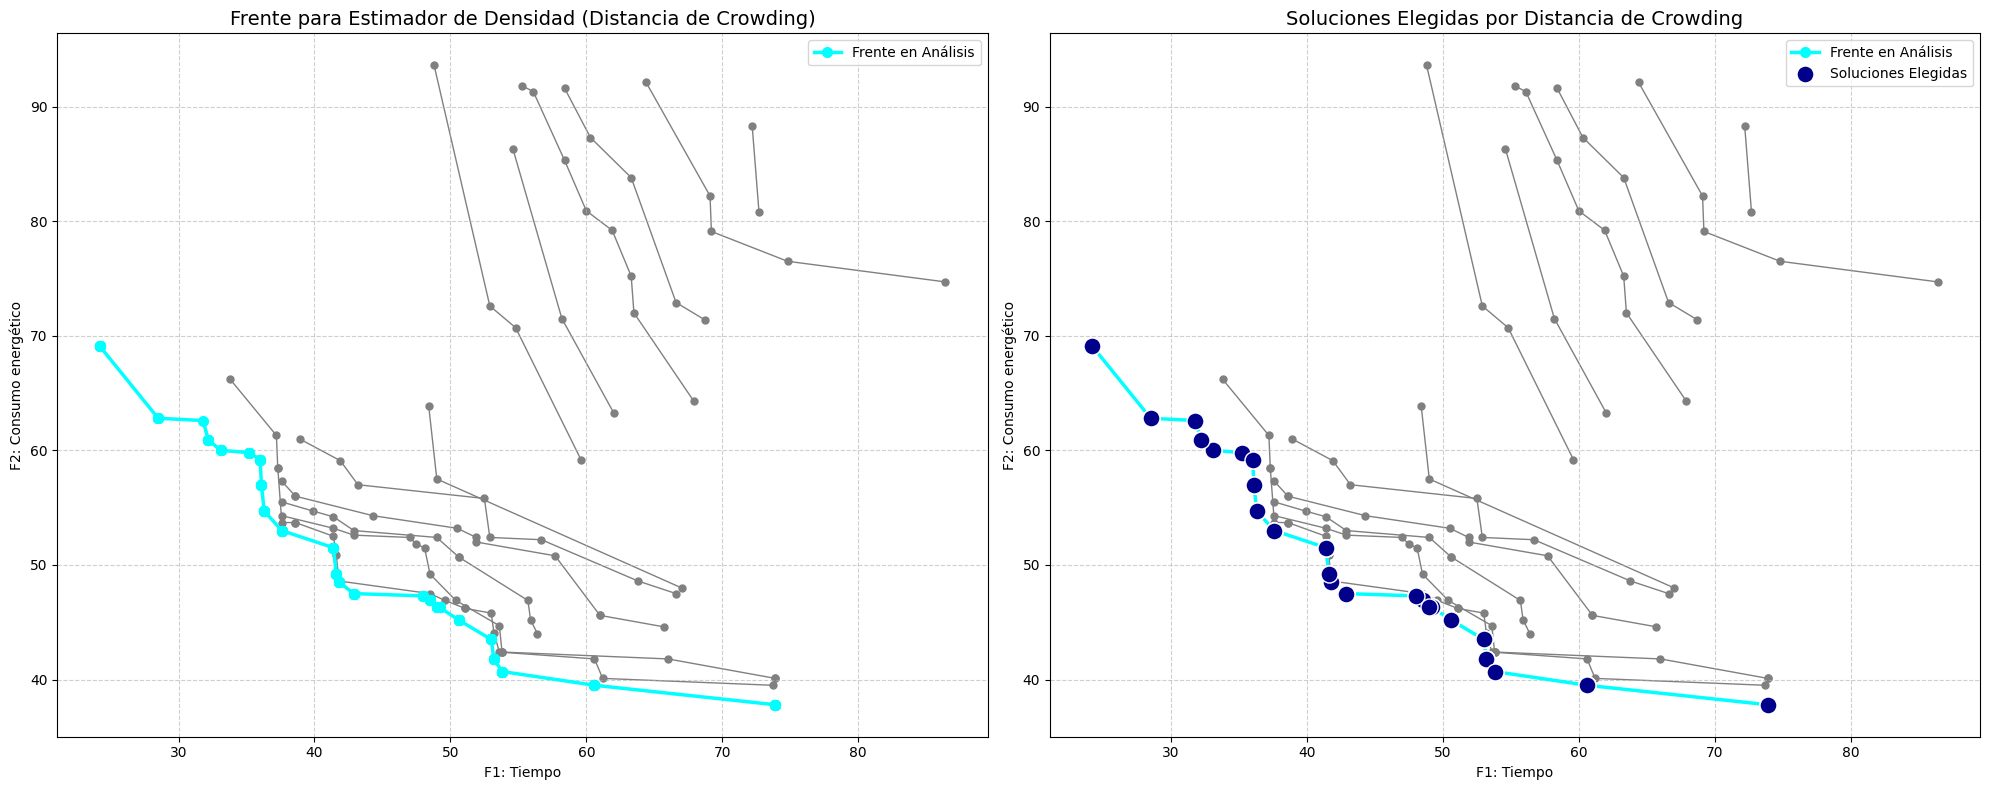

In [12]:
graficar_distancia_crowding(conjuntos_F_Pareto[1], vector_idx_frentes_dist_crowding[1]-1, conjunto_soluciones_dist_crowding[1])

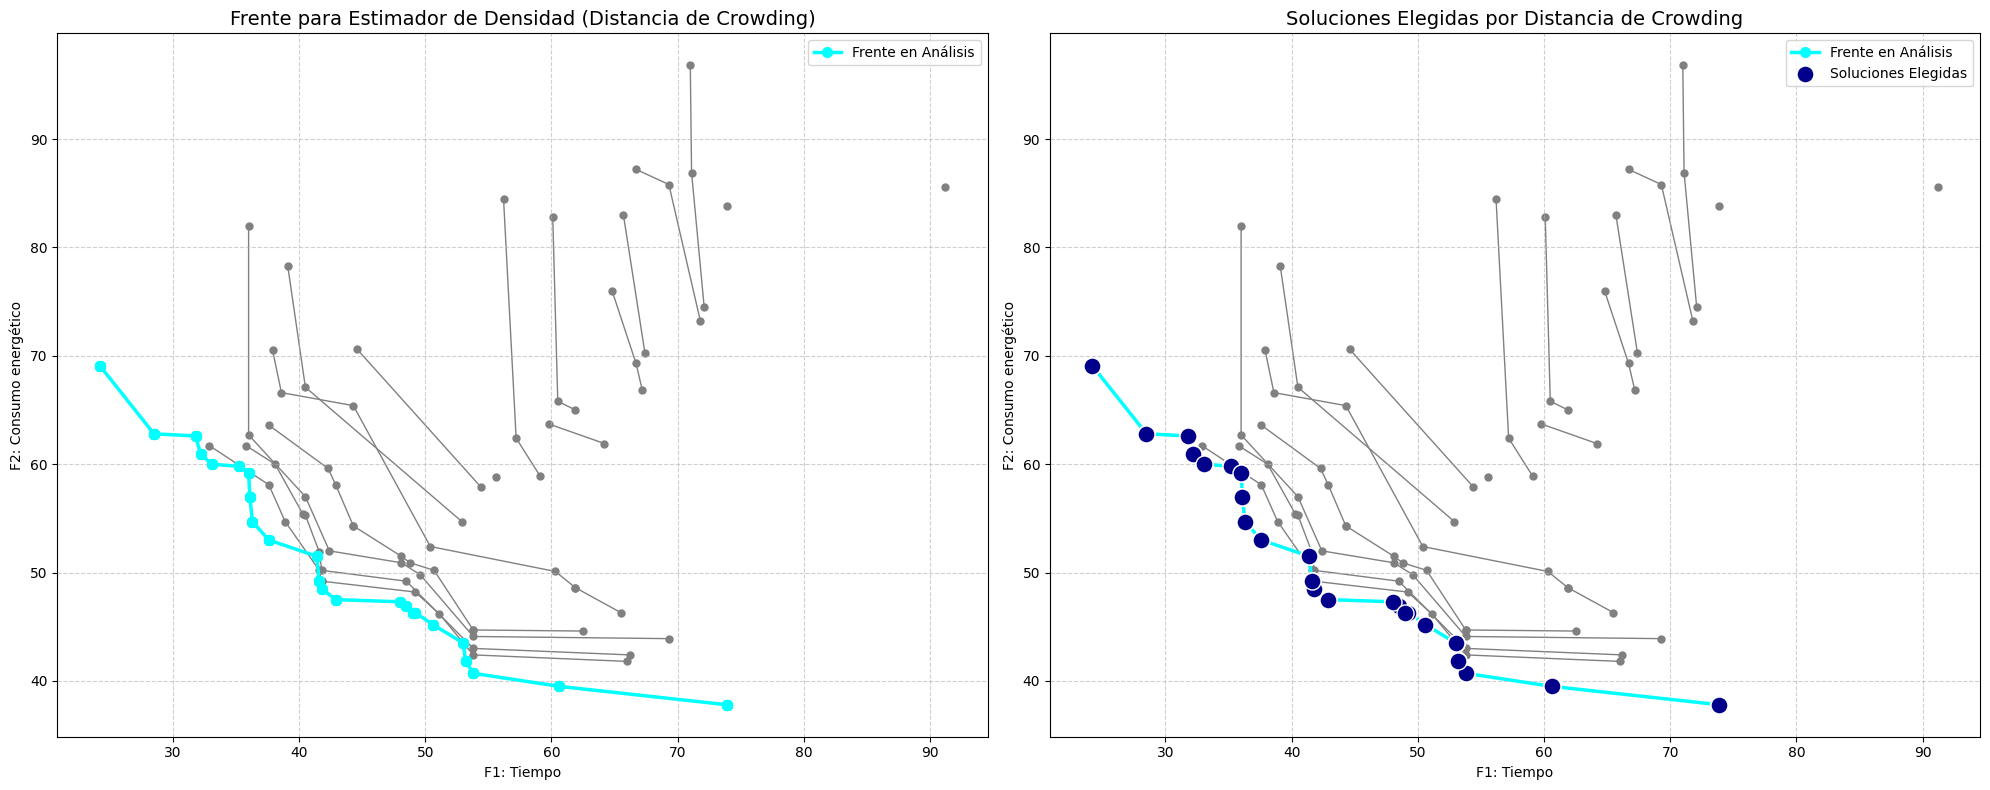

In [13]:
graficar_distancia_crowding(conjuntos_F_Pareto[3], vector_idx_frentes_dist_crowding[3]-1, conjunto_soluciones_dist_crowding[3])

### Realizando la codificación del diagrama de gantt

In [ ]:
vector = cod_mejor_tiempo[0][0]
datos_diagrama_G = transformar_datos_visualizador(m_oper_tiempo, tareas, vector)
graficar_gantt(datos_diagrama_G)

T1-Op1 (ID:2): Máq 2, Inicia: 0.00, Dura: 4.20, Termina: 4.20
T1-Op2 (ID:4): Máq 1, Inicia: 4.20, Dura: 4.80, Termina: 9.00
T1-Op3 (ID:5): Máq 1, Inicia: 9.00, Dura: 3.80, Termina: 12.80
T2-Op1 (ID:1): Máq 3, Inicia: 0.00, Dura: 2.50, Termina: 2.50
T2-Op2 (ID:3): Máq 4, Inicia: 2.50, Dura: 6.70, Termina: 9.20
T2-Op3 (ID:5): Máq 1, Inicia: 12.80, Dura: 3.80, Termina: 16.60
T3-Op1 (ID:1): Máq 3, Inicia: 2.50, Dura: 2.50, Termina: 5.00
T3-Op2 (ID:2): Máq 2, Inicia: 5.00, Dura: 4.20, Termina: 9.20
T3-Op3 (ID:3): Máq 4, Inicia: 9.20, Dura: 6.70, Termina: 15.90
T3-Op4 (ID:4): Máq 4, Inicia: 15.90, Dura: 4.70, Termina: 20.60
T3-Op5 (ID:5): Máq 4, Inicia: 20.60, Dura: 3.60, Termina: 24.20
T4-Op1 (ID:4): Máq 2, Inicia: 9.20, Dura: 5.30, Termina: 14.50
T4-Op2 (ID:5): Máq 1, Inicia: 16.60, Dura: 3.80, Termina: 20.40
T5-Op1 (ID:2): Máq 2, Inicia: 14.50, Dura: 4.20, Termina: 18.70
T5-Op2 (ID:4): Máq 2, Inicia: 18.70, Dura: 5.30, Termina: 24.00
T6-Op1 (ID:1): Máq 3, Inicia: 5.00, Dura: 2.50, Termina